# Question:
Develop  a  predictive  model  in  which  the  dependent variable  isCvdVax_DisparityY.  Your  task  is  to examine  the  role  of  different  socioeconomic and  demographic  variables  indetermining  thecovid-19 vaccination rate disparities. Note following points to complete this project. 

(1)You  are  free  to  choose  any prediction/regression model  to  examine  the  role  of  predictors  in determining CvdVax_DisparityY.  But  use  only  data labelledas “train” for the model building purpose. Evaluate the performance ofyourmodels on the test data.

(2)Report three models that give best result on the test dataset. Mentionthe final model that you would select. Explainthe reason for its selection. 

(3)How would you assess the importance of different predictors in your model? Which predictors are most important in determining the racial disparity in covid-19 vaccinate rate? 

(4)Areyour  findings  similar  to  the resultsreported  by  authors  in  Table  1of  the  article  (see  the hyperlink above)? If not, why? 

(5)Upload Python/R code with your project report. 

# IME-project
- Examine the relationship between social determinants of health and racial disparitiesin covid-19vaccinationat the county level in US
- dates worked:
    - date: 28-09 --> understanding the data variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

%matplotlib inline 

/home/sunild/.local/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
data=pd.read_csv('ime692_project.csv')

# seperate data into test and train based on `Test` indicator
pd.options.mode.chained_assignment = None  # default='warn' --> to supress chain assignment warning <--
test_data=data.loc[data.Test==1] ## previous indices could be useful ##
train_data=data.loc[data.Test==0]
print("==========================================")
print("No of testing observations: ",test_data.shape[0])
print("No of training observations: ",train_data.shape[0])
print("==========================================")

# drop the indicator inplace
test_data.drop('Test',axis=1,inplace=True)
train_data.drop('Test',axis=1,inplace=True)

# sepearate predicted and regressor variables
y_test_data=test_data['CvdVax_DisparityY'].tolist()
X_test_data=test_data.drop('CvdVax_DisparityY',axis=1)
y_train_data=train_data['CvdVax_DisparityY'].tolist()
X_train_data=train_data.drop('CvdVax_DisparityY',axis=1)


No of testing observations:  225
No of training observations:  531


In [3]:
## initial data analysis
print(data.shape)
print(data.columns)

(756, 19)
Index(['State', 'County', 'IT_WholeRate', 'HighSchool_WholeRate',
       'MedianInc_WholeAvg', 'republican_rate', 'Segregation', 'urban',
       'racial_weighted_bias', 'hesitancy', 'HighSchool_Disparity',
       'IT_Disparity', 'MedianInc_Disparity', 'CvdVax_DisparityY', 'vehicle',
       'FacNumRate', 'CaseRate', 'Black_Prop', 'Test'],
      dtype='object')


### Which variables to use(PCA):
- All variables are numeric except State and County Name -
    - also urban(1)/rural(0): but can I keep it off for the moment? IG yes.
- Normalization: which `z-score` or `min-max`
- Role of predictors: `some score based approach ?`
    - disparity variables must be included for `y`
    - Other factors also affect but are they worth including with model complexity there
    - Variable matching(6): `overall -- difference`
        - IT_WholeRate -- IT_Disparity
        - MedianInc_WholeAvg -- MedianInc_Disparity
        - HighSchool_WholeRate -- HighSchool_Disparity
    - `Seems` Imp for `y`: 
        - racial_weighted_bias
        - Segregation
        - republican_rate
        - `hesitancy` :smoking: ?
        - FacNumRate(economic)
    - `Less` imp for `y`:
        - vehicle(economic)
        - CaseRate
        - Black_Prop
- To be honest all seems important; that is why they included right ... but relatievly which ones are more and less ... that need to be seen
- real question to answer would be is there any role of previliages(economic-social) and political alliances; it seems so from intuitoin but what does the data tell us?

### Which models for prediction/regression of `y`? 
1. A: basic things is to keep model as simple as possible with few variables to exaplain(`PCA` can be done here to check explained variability by a particular variable/regressor), if possible.
    - Multi-linear regression model (linear or not?): covariance or other measures of linearity could be used to check.
    - Decision tree: regression trees
    - NN 😄
    - Prob. gaussian(linear special case) model

### Concepts from class:
- PCA: to check variability explained by variables and dim reduction
- Linearity measures{corr, factor analysis -- see below}
- Sampling: bootstrap and cross-validation
- Basic pre-model concepts: z-score, min-max normalizations
- Models: 
    - high dim regressions: 
        - lasso 
        - lar
    - logistics regression? Nah, it is for categorical(usually binary) predictive variable `mainly`
    - Ensemble Models: Ensemble models use multiple machine learning algorithms to obtain better predictive performance than what could be obtained from one algorithm alone.
    - Factor Analysis: Factor analysis is a method used to describe variability and aims to find independent latent variables.
    - Random forsts: ?? -- > ensembling of multiple regression trees
    - Generalized Linear Model (GLM) for Two Values ??

## Pre-model steps
- Normalization of numeric variables
    - why?  some variables intrinsically influence the result more due to its larger value. But this doesn't necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range. 
    - `z-score`
    - `min-max`
    - also [read](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re) for further explanation
- Boxplot to see distribution of normalized data
- PCA

In [22]:
## normalize min-max : droped State and County names
# training data
X_train_data_normalized=X_train_data.drop((['State','County']),axis=1)
min_cols=np.min(X_train_data_normalized)
max_cols=np.max(X_train_data_normalized)
X_train_data_normalized = (X_train_data_normalized - min_cols)/(max_cols-min_cols)

#testing data
X_test_data_normalized=X_test_data.drop((['State','County']),axis=1)
min_cols=np.min(X_test_data_normalized)
max_cols=np.max(X_test_data_normalized)
X_test_data_normalized = (X_test_data_normalized - min_cols)/(max_cols-min_cols)

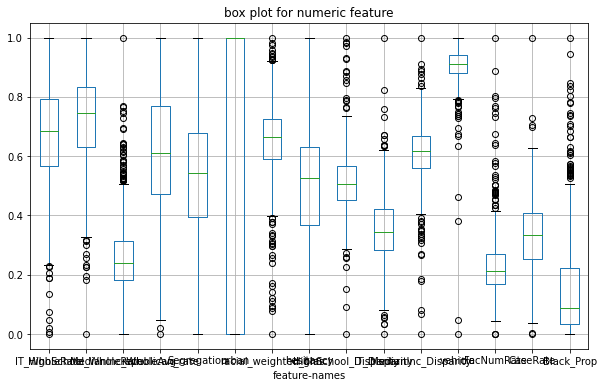

In [69]:
## boxplots
plt.figure(figsize=(10,6))
X_train_data_normalized.boxplot(column=list(X_train_data_normalized.columns))
plt.title('box plot for numeric feature')
plt.xlabel('feature-names')
plt.show()

## PCA on training data

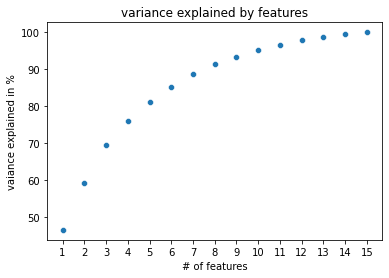

In [89]:
n=X_train_data_normalized.shape[1]
pca=PCA(n_components=n)
X_train_data_transformed=pca.fit_transform(X_train_data_normalized)
X_test_data_transformed=pca.fit_transform(X_test_data_normalized)

foo_ratio=pca.explained_variance_ratio_

# to get cummulative
var_ratio=[]
for i in range(n):
    var_ratio.append(100*sum(foo_ratio[0:i+1]))

# plotting the variance explined curve (in %)
sns.scatterplot(x=np.arange(n)+1,y=var_ratio)
plt.title('variance explained by features')
plt.xlabel('# of features')
plt.ylabel('vaiance explained in %')
plt.xticks(np.arange(n)+1)
plt.show() # to avoid text outputs

- how pca could help in reducing dimension and working on tranformed data, it could be used since around `90%` variance is being explained by `9-10` features.

In [91]:
model_lr=LinearRegression()
model_lr.fit(X_train_data_normalized,y_train_data)

print('==========================================')
print('Model prediction without any modification: ',round(100*model_lr.score(X_test_data_normalized,y_test_data),2)) # veeeeeery bad -- .even on training data
coeff_dict={}
coeffs=model_lr.coef_.tolist()
coeffs.append(model_lr.intercept_)
col_names=X_train_data_normalized.columns.tolist()
col_names.append('Intercept')
for i in range(n):
    coeff_dict[col_names[i]]=coeffs[i]
print(coeff_dict)
print('==========================================')

'''print('Feature coefficients are: \n',model_lr.coef_)
print(X_train_data_normalized.columns)
print('Intercept term is: ',model_lr.intercept_)'''

print('THINGS ARE NOT LOOKING GREAT WITH SIMPLE LINEAR REGRESSION')

Model prediction without any modification:  12.04
{'IT_WholeRate': 3.3104979662286116, 'HighSchool_WholeRate': 5.794068515086227, 'MedianInc_WholeAvg': -18.063139882208596, 'republican_rate': -22.29026144323356, 'Segregation': 14.174742951831332, 'urban': -1.5975750923387475, 'racial_weighted_bias': 4.631006928156119, 'hesitancy': -12.594120385386047, 'HighSchool_Disparity': 11.381895514781359, 'IT_Disparity': -9.085009833158535, 'MedianInc_Disparity': 11.845903290816246, 'vehicle': 16.920836138060785, 'FacNumRate': -6.38400474969876, 'CaseRate': 27.48108328771798, 'Black_Prop': -18.128002796574513}
THINGS ARE NOT LOOKING GREAT WITH SIMPLE LINEAR REGRESSION
